# The inverted pendulum model of the human standing

Marcos Duarte

Despite the enormous complexity of the human body, part of the mechanical behavior of the human body during the standing still posture, namely the displacements of the center of gravity ($COG$) and center of pressure ($COP$) in the anterior-posterior direction, can be elegantly portraied by a physical-mathematical model of an inverted pendulum with rigid segments articulated by joints.

Using such a model, it's possible to estimate the COG vertical projection (COGv) from the COP displacement. The Python function `cogve.py` (code at the end of this text) performs this estimation. The function signature is:
```python
cogv = cogve(COP, freq, mass, height, show=False, ax=None)
```
Let's now derive the inverted pendulum model of the human standing posture implemented in this function.

## Derivation of the inverted pendulum model

In the most simple version of the model, the human body in the sagittal plane is reduced to a two-link body with a single inverted pendulum articulated by only one joint (representing the feet, with the rest of the body articulated by the ankle joint). Let's deduce the equations for such inverted pendulum model as the representation at the sagital plane of the human standing still posture. The inverted pendulum model and the correspondent free-body diagrams (FBDs) are shown in Figure 1.

<div><figure><img src="./../images/invpendulum.png" width=500 alt="onelink"/><figcaption><b>Figure 1.</b> <i>Model of a two-link inverted pendulum and the external forces acting on it for the representation at the sagital plane of the human standing still posture and the corresponding free-body diagrams. $COG$: body center of gravity; $COG_v$: $COG$ vertical projection (at the horizontal plane) in relation to the ankle joint; $COP$: body center of pressure in relation to the ankle joint; $GRF$: ground reaction force (typically measured by a force plate); $\alpha$: angle of the body in relation to the vertical direction; $m$: mass of the body minus feet; $g$: acceleration of gravity; $F_a$ and $T_a$: resultant force and torque at the ankle joint; $h$: height of the $COG$ in relation to the ankle joint; $m_f$ and $h_f$: mass and height of the feet.</i></figcaption></figure></div>

The equations of motion for each FBD of the feet and rest-of-body segments at the sagittal plane ($xy$ plane) can be expressed in the form of the Newton-Euler equations.  
<br>
<div style="background-color:#FBFBEF;border:1px solid black;padding:10px;">
<b>The Newton-Euler equations</b>
<br />
The [Newton-Euler equations](http://en.wikipedia.org/wiki/Newton%E2%80%93Euler_equations) are a formalism to describe the combined translational and rotational dynamics of a rigid body.  
For a two-dimensional (at the $xy$ plane) movement, their general form are given by:  
<br />
$$ \sum \mathbf{F} = m \mathbf{\ddot{r}}_{cm} $$  

$$ \sum \mathbf{T}_z = I_{cm} \mathbf{\ddot{\alpha}}_z $$  

Where the movement is considered around the center of mass ($cm$) of the body, $\mathbf{F}$ and $\mathbf{T}$ are, respectively, the forces and torques acting on the body, $\mathbf{\ddot{r}}$ and $\mathbf{\ddot{\alpha}}$ are, respectively, the linear and angular accelerations, and $I$ is the body moment of inertia around the $z$ axis passing through the body center of mass.   
It can be convenient to describe the rotation of the body around other point than the center of mass. In such cases, we express the moment of inertia around a reference point $o$ instead of around the body center of mass and we will have an additional term to the equation for the torque:  
<br />
$$ \sum \mathbf{T}_{z,O} = I_{o} \mathbf{\ddot{\alpha}}_z + \mathbf{r}_{cm,o}\times m \mathbf{\ddot{r}}_o $$  

Where $\mathbf{r}_{cm,o}$ is the position vector of the center of mass in relation to the reference point $o$ and $\mathbf{\ddot{r}}_o$ is the linear acceleration of this reference point.  
[See this notebook about free-body diagram](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/FreeBodyDiagram.ipynb).  
</div>

For the case of an inverted pendulum representing at the sagittal plane the body at the standing still posture, let's solve the Newton-Euler equations considering the rotation around the ankle joint (because it will simplify the problem) and let's adopt the simplifications that the feet don't move (including the ankle, so $\mathbf{\ddot{r}}_o=0$ in the Newton-Euler equation) and their mass are neglegible in relation to the mass of the rest of the body.   

For the feet, we have:

$$ \begin{array}{l l}
-F_{ax} + GRF_x = 0 \\
\\
-F_{ay} + GRF_y = 0 \\
\\
-T_a + COP \cdot GRF_y + h_f \cdot GRF_x = 0 
\end{array} $$  

And for the rest of the body:  

$$ \begin{array}{l l}
F_{ax} = m\ddot{x}_{cm} \\
\\
F_{ay} - mg = m\ddot{y}_{cm} \\
\\
T_a - COG_v \cdot mg = I_a \ddot{\alpha} 
\end{array} $$  

Where $I_a$ is the moment of inertia of the whole body around the ankle joint.  
During the standing still posture, the $GRF$ horizontal component is typically much smaller than the $GRF$ vertical component and the torque of the former can be neglected. In addition, the magnitude of the $GRF$ vertical component is approximately constant and equal to the body weight.   
Considering these approximations, the ankle joint torque using the equation for the feet is given by:  

$$ T_a \approx COP \cdot mg $$  

If now we substitute the ankle joint torque term in the equation for the torques calculated for the rest-of-body segment, we have:  

$$ COP - COG_v \approx \frac{I_a}{mg} \ddot{\alpha} $$  

That is, the angular acceleration of the body is proportional to the difference between $COP$ and $COG_v$ displacements (with respect to the ankle joint position).  

We can continue with the deduction and now substitute the angular displacement by a term proportional to $COG_v$ if we use the following trignometric relation (see figure above): $sin \alpha=COG_v/h$. But, during the standing still posture $\alpha$ is typicall very small and we can approximate $ sin\alpha \approx \alpha $ and $\alpha \approx COG_v/h$. However, bear in mind that $\alpha$ is defined as counterclockwise positive while $COG_v$ is positive when pointing to the right direction. This means that in fact $\alpha \approx -COG_v/h$. As $h$ is constant, the second derivative of $\alpha$ with respect to time is simply the second derivative of $COG_v$ divided by $h$. 

Finally, the last equation can be expressed in the following form:

$$ COG_v - COP \approx \frac{I_a}{mgh} \ddot{COG}_v $$  

Or simply:  

$$ COG_v - COP \approx k \, \ddot{COG}_v $$  

Where $k = I_a/(mgh)$.  
If the human body is represented as a rigid bar, its moment of inertia will be approximately equal to $1.33mh^2$, so $k \approx 1.33h/g$.  
In turn, from the Newton-Euler equations, the horizontal acceleration of $COG$ is equal to the horizontal component of $GRF$ divided by the body mass and the equation above can be expressed as:  

$$ COG_v - COP \approx \frac{k}{m} GRF_x $$  


## Implications of the inverted pendulum model

These two last equations express a very simple relation between body segment parameters, $COG_v$, $COP$, body acceleration, and horizontal force.   
Solely based on these equations it is possible to predict some interesting relations among the variables in these equations, which have been experimentally observed:  
 -	$COG_v-COP$ is positively correlated with the horizontal ground reaction force in the anterior-posterior direction (Winter et al. 1998; Morasso and Schieppati 1999; Zatsiorsky and Duarte 2000);  
 -	$COG_v$ behaves as a low-pass filtered version of the $COP$ signal and this fact has been used in a method to derive $COG_v$ from the $COP$ signal (Winter 1995; Caron et al. 1997; Morasso and Schieppati 1999). This method produces similar results as other methods (Lafond et al. 2004);   
 -	For a continuously regulated inverted pendulum (like the standing still posture), the common frequencies of $COG_v$ and $COP$ signals are in phase (Morasso and Schieppati 1999);  
 -	When the horizontal force is zero, $COG_v$ and $COP$ coincide and this fact has been used as a method to derive $COG_v$ from the $COP$ displacement and the horizontal $GRF$ (King and Zatsiorsky 1997; Zatsiorsky and Duarte 2000).  
 
Note that the four predictions made above are based entirely on the mechanical derivation of the inverted pendulum model. Nothing has been said about what type of neural control is being used for the regulation of the standing posture. This means that the statements above are consequence of the mechanical nature of the modeled phenomenon.

Obviously, the most straightforward prediction of the single inverted pendulum model concerning the **kinematics of the segments** of the human body would be that we should observe merely the motion at the ankle joint and nothing in the other joints. This prediction has not been observed (see for example, Pinter et al. 2008 and Gunther et al. 2009). During standing still, we seem to use all our joints and this is task dependent.   
However, one important point to consider is that even if the inverted pendulum fails as a suitable model of the **kinematics of the segments**, the inverted pendulum succeds as a model of the **kinematics of global body variables**, such as $COG_v$ and $COP$, and their relation to kinetic variables, the external forces acting on the body.   

Certainly everyone agrees that the inverted pendulum model is insufficient to capture all the essential characteristics of the posture during standing. Nevertheless, the greatest power of the single inverted pendulum model is its simplicity, and it is somewhat surprising to note how much this simple model can capture the of the investigated phenomenon.

## Estimation of COGv from the COP signal

Based on the inverted pendulum model, it's possible to estimate the $COG_v$ displacement from the $COP$ displacement after some mathematical manipulation we show next.  
Back to the relation between $COG_v$ and $COP$ displacements, it has the form:  

$$ y(t) - x(t) = k\,\ddot{y}(t) $$  

Where $y(t)$ stands for the $COG_v$ signal and $x(t)$ for the $COP$ signal, which are functions of time, and $k = I_a/(mgh)$.  
The equation above is a linear ordinary differential equation of second order. This equation is solvable in the time domain, but if we transform it to the frequency domain using the Fourier transform, we will find a simpler relation between $COG_v$ and $COP$. 

<br>
<div style="background-color:#FBFBEF;border:1px solid black;padding:10px;">
<b>The Fourier transform</b>  
The [Fourier transform](http://en.wikipedia.org/wiki/Fourier_transform) is a mathematical operation to transform a signal which is function of time, $g(t)$, into a signal which is function of frequency, $G(f)$, and it is defined by:  
<br />
$$ \mathcal{F}[g(t)] = G(f) = \int_{-\infty}^{\infty} g(t) e^{-i2\pi ft} dt $$  

Its inverse operation is:  
<br />
$$ \mathcal{F}^{-1}[G(f)] = g(t) = \int_{-\infty}^{\infty} G(f) e^{i2\pi ft} df $$  

The function $G(f)$ is the representation in the frequency domain of the time-domain signal, $g(t)$, and vice-versa. The functions $g(t)$ and $G(f)$ are referred to as a Fourier integral pair, or Fourier transform pair, or simply the Fourier pair.  
[See here for an introduction to Fourier transform](http://www.thefouriertransform.com/transform/fourier.php) and [see here for the use of Fourier transform to solve differential equations](http://www.thefouriertransform.com/applications/differentialequations.php).
</div>

<br>
Let's apply the Fourier transform to the differential equation with $COG_v$ and $COP$:  

$$ Y(j\omega) - X(j\omega) = -k\,\omega^2Y(j\omega) $$  

Where we defined $y(t) \Leftrightarrow Y(j\omega)$ and $x(t) \Leftrightarrow X(j\omega)$ as the Fourier pairs, $j$ is the imaginary unit, and $\omega$ is the angular frequency, $2\pi f$.   
The reason why we use the Fourier transform is because we started with a second order differential equation and ended with the simple algebraic equation above. Rearranging the equation above:  

$$ \frac{Y(j\omega)}{X(j\omega)} = \frac{\omega_0^2}{\omega_0^2 + \omega^2} $$  

Where $ \omega_0 = 1/\sqrt{k}$.  
If we imagine a system where the $COP$ is the input and the $COG_v$ the output, the right side of the equation above is known as the [transfer function](http://en.wikipedia.org/wiki/Transfer_function) of such system, the ratio between the output and the input.   
Analysing the transfer function given in the equation above, we see that it is of the type of a low-pass filter (and $\omega_0$ is the cutoff frequency); because of that, we can say that the $COGv$ signal is a low-pass filtered version of the $COP$ signal.

We can implement such low-pass filter in order to determine the $COG_v$ using the $COP$ signal. For that, we simply have to estimate the Fourier transform of the $COP$ signal, multiply by the transfer function (the right side of the equation above), and calculate the inverse Fourier transform of this result. The Python function `cogve.py` (code at the end of this text) estimates the $COG_v$ using the $COP$ data based on this algorithm. Let's test this function, first we have to import the necessary Python libraries and configure the emvironment:

In [1]:
# Import the necessary libraries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import sys
sys.path.insert(1, r'./../functions')
from cogve import cogve

Let's use stabilographic data found in the internet:

In [2]:
import pandas as pd  # use Pandas to read data from a website
fileUrl = 'http://www.udel.edu/biology/rosewc/kaap686/reserve/cop/copdata.txt'
COP = pd.read_table(fileUrl, skipinitialspace=True, sep=None, engine='python')
COP = COP.values / 10  # mm to cm
freq = 100
print('COP shape: ', COP.shape)

COP shape:  (4095, 2)


<IPython.core.display.Javascript object>


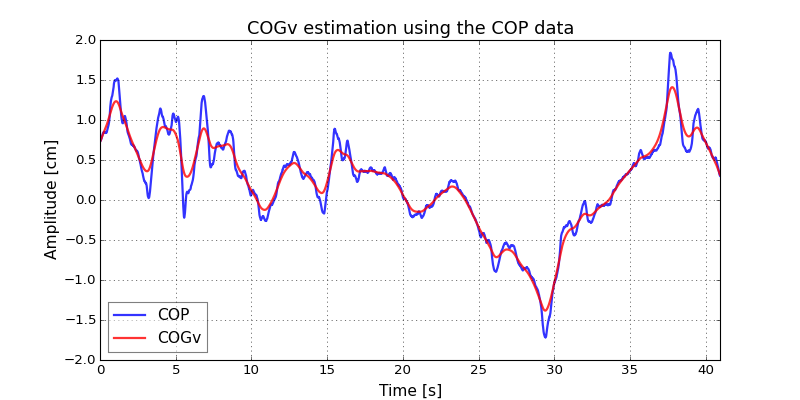

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cogv = cogve(COP[:, 0], freq=100, mass=70, height=175, ax=ax, show=True)  # guess mass, height

## References

- Caron O, Faure B, et al. (1997) [Estimating the centre of gravity of the body on the basis of the centre of pressure in standing posture](http://www.ncbi.nlm.nih.gov/pubmed/9456386). J. Biomech. 30, 1169-1171.   
- Lafond D, Duarte M, et al. (2004) [Comparison of three methods to estimate the center of mass during balance assessment](http://ebm.ufabc.edu.br/publications/md/JB03.pdf). J. Biomech. 37, 1421-1426.
- King D, Zatsiorsky VM (1997) [Extracting gravity line displacement from stabilographic recordings](http://www.sciencedirect.com/science/article/pii/S0966636296011010). Gait & Posture 6, 27-38.   
- Morasso PG, Spada G, et al. (1999) [Computing the COM from the COP in postural sway movements](http://www.sciencedirect.com/science/article/pii/S0167945799000391). Human Movement Science 18, 759-767.   
- Winter DA (1995) [A.B.C. (Anatomy, Biomechanics and Control) of Balance during Standing and Walking](https://books.google.com.br/books?id=0lSqQgAACAAJ&). Waterloo, Waterloo Biomechanics.   
- Winter DA, Patla AE, et al. (1998) [Stiffness control of balance in quiet standing](http://www.ncbi.nlm.nih.gov/pubmed/9744933). J. Neurophysiol. 80, 1211-1221.  
- Zatsiorsky VM, Duarte M (2000) [Rambling and trembling in quiet standing](http://ebm.ufabc.edu.br/publications/md/MC00.pdf). Motor Control 4, 185-200.

## Function cogve.py

In [ ]:
# %load ./../functions/cogve.py
"""COGv estimation using COP data based on the inverted pendulum model."""

from __future__ import division, print_function
import numpy as np

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = "1.0.2"
__license__ = "MIT"


def cogve(COP, freq, mass, height, show=False, ax=None):
    """COGv estimation using COP data based on the inverted pendulum model.

    This function estimates the center of gravity vertical projection (COGv)
    displacement from the center of pressure (COP) displacement at the
    anterior-posterior direction during quiet upright standing. COP and COGv
    displacements are measurements useful to quantify the postural sway of a
    person while standing.

    The COGv displacement is estimated by low-pass filtering the COP
    displacement in the frequency domain according to the person's moment
    of rotational inertia as a single inverted pendulum [1]_.

    Parameters
    ----------
    COP    : 1D array_like
             center of pressure data [cm]
    freq   : float
             sampling frequency of the COP data
    mass   : float
             body mass of the subject [kg]
    height : float
             height of the subject [cm]
    show   : bool, optional (default = False)
             True (1) plots data and results in a matplotlib figure
             False (0) to not plot
    ax     : matplotlib.axes.Axes instance, optional (default = None)

    Returns
    -------
    COGv   : 1D array
             center of gravity vertical projection data [cm]

    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/IP_Model.ipynb

    Examples
    --------
    >>> from cogve import cogve
    >>> y = np.cumsum(np.random.randn(3000))/50
    >>> cogv = cogve(y, freq=100, mass=70, height=170, show=True)
    """

    from scipy.signal._arraytools import odd_ext
    import scipy.fftpack

    COP = np.asarray(COP)
    height = height / 100  # cm to m
    g = 9.8  # gravity acceleration in m/s2
    # height of the COG w.r.t. ankle (McGinnis, 2005; Winter, 2005)
    hcog = 0.56 * height - 0.039 * height
    # body moment of inertia around the ankle
    # (Breniere, 1996), (0.0572 for the ml direction)
    I = mass * 0.0533 * height ** 2 + mass * hcog ** 2
    # Newton-Euler equation of motion for the inverted pendulum
    # COGv'' = w02*(COGv - COP)
    # where w02 is the squared pendulum natural frequency
    w02 = mass * g * hcog / I
    # add (pad) data and remove mean to avoid problems at the extremities
    COP = odd_ext(COP, n=freq)
    COPm = np.mean(COP)
    COP = COP - COPm
    # COGv is estimated by filtering the COP data in the frequency domain
    # using the transfer function for the inverted pendulum equation of motion
    N = COP.size
    COPfft = scipy.fftpack.fft(COP, n=N) / N  # COP fft
    w = 2 * np.pi * scipy.fftpack.fftfreq(n=N, d=1 / freq)  # angular frequency
    # transfer function
    TF = w02 / (w02 + w ** 2)
    COGv = np.real(scipy.fftpack.ifft(TF * COPfft) * N)
    COGv = COGv[0: N]
    # get back the mean and pad off data
    COP, COGv = COP + COPm, COGv + COPm
    COP, COGv = COP[freq: -freq], COGv[freq: -freq]

    if show:
        _plot(COP, COGv, freq, ax)

    return COGv


def _plot(COP, COGv, freq, ax):
    """Plot results of the cogve function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        time = np.linspace(0, COP.size / freq, COP.size)
        if ax is None:
            _, ax = plt.subplots(1, 1)
        ax.plot(time, COP, color=[0, 0, 1, .8], lw=2, label='COP')
        ax.plot(time, COGv, color=[1, 0, 0, .8], lw=2, label='COGv')
        ax.legend(fontsize=14, loc='best', framealpha=.5, numpoints=1)
        ax.set_xlabel('Time [s]', fontsize=14)
        ax.set_ylabel('Amplitude [cm]', fontsize=14)
        ax.set_title('COGv estimation using the COP data', fontsize=16)
        ax.set_xlim(time[0], time[-1])
        plt.grid()
        plt.show()
